In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("lab06.ipynb")

# E7: Lab Assignment 06

You must submit the lab to Gradescope by the due date. You will submit the zip file produced by running the final cell of the assignment.

## About this Lab
The objective of this assignment is to familiarize you with plotting as well as reading and writing data.

## Autograder
You will be provided with some test cases (i.e., sample input data) and associated answers (i.e., expected outputs) that you can use to help check your code. The provided test cases are not exhaustive, and it is your responsibility to ensure that your code works in general, not just for a few supplied test cases. We may use additional hidden test cases in grading your lab assignments.

**Run the first cell, Initialize Otter**, to import the autograder and submission exporter.

## Answer cells
Throughout the assignment, replace `...` with your answers. We use `...` as a placeholder and theses should be deleted and replaced with your answers.

Your answers must be in the cells marked `# ANSWER CELL`, including your final calculation/code. However, do not perform scratchwork in `# ANSWER CELL`. Add a new cell to perform your scratchwork. Your scratchwork will not be graded and does not need to be included in your submission unless otherwise noted.

To read the documentation on a Python function, you can type `help()` and add the function name between parentheses.

## Score Breakdown
Question| Points
--- | --
1 | 5.0
2 | 7.0
3 | 8.0
4 | 5.0
5 | 0.0
Total | 25.0

**Run the cell below**, to import the required modules.

In [2]:
# Please run this cell, and do not modify the contents
import math
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
np.seterr(all='ignore');

import hashlib
def get_hash(num):
    """Helper function for assessing correctness"""
    return hashlib.md5(str(num).encode()).hexdigest()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


## Question 1: Heated Copper Bar

In this problem you will examine the heat distribution in a one-dimensional copper bar over time. In particular, you will create a visual representation of the temperature $u(x,t)$ at different points $x$ along the bar as time $t$ progresses. The copper bar shown in Figure 1 has a fixed length $l$ and known initial temperature distribution $u(x,0) = f(x)$. The two ends are maintained at a constant temperature of 0&deg;C.

<img src='resources/rod.png' width=55%/>
 <figcaption style="text-align:center"><strong> Figure 1.  1D bar with homogeneous boundary conditions,</strong> <a href="https://en.wikipedia.org/wiki/Heat_equation#/media/File:Temp_Rod_homobc.svg">Wikipedia</a></figcaption>   

The bar has the following physical properties:
* length $l = 100\,\mathrm{cm}$
* constant mass density $\rho = 8.92 \,\mathrm{g/cm^3}$
* specific heat capacity $c  = 0.092 \,\mathrm{cal/( g\,^\circ C)}$
* thermal conductivity $k = 0.95 \, \mathrm{cal/(cm\,s\,^{\circ}C})$

The thermal diffusivity $\alpha$ is related to these physical properties through the equation $$\alpha = \dfrac{k}{c \rho}$$
Assume the initial temperature distribution is
$$ u(x,0) = f(x) = 100 \sin\left(\frac{3\pi x}{l}\right),  \label{eq:u0}\tag{1} $$
where $x$ is the horizontal coordinate along the bar. 
The temperature distribution $u(x,t)$ at point $x$ and time $t$ under these conditions is then 

$$ u(x,t) =  \exp\left(-\lambda^2 t\right)u(x,0),  \label{eq:uxt}\tag{2} $$
where we've defined
$$\lambda^2 = \alpha\left(\dfrac{3\pi}{l}\right)^2$$

### Question 1.0

Assign the bar length to the variable `length` and define a lambda function `u0(x)` which takes in:
* `x`: `float` or `np.ndarray`
     * coordinates along the bar, $x \in [0,l]$

and returns the intital temperature distribution shown in Eq.$\eqref{eq:u0}$ at each point in `x` for this particular problem.

Once you are done, test your `u0` function for `x = np.linspace(0,length)` and assign it to the variable `q1_0`. Feel free to test other inputs.

In [3]:
# ANSWER CELL

# Bar length, cm
length = 100 # SOLUTION

# Initial temperature distribution function u0(x)
u0 = lambda x: 100*np.sin(3*np.pi*x/length) # SOLUTION 

In [4]:
# TEST YOUR FUNCTION HERE
q1_0 = u0(x=np.linspace(0,length)) # SOLUTION

In [ ]:
grader.check("q1.0")

### Question 1.1

Assign the bar density, specific heat and thermal conductivity to the variables `rho`,`c` and `k`, respectively. Similarly, assign $\alpha$ to `alpha` and $\lambda^2$ to `lam_sq` using the definitions in the problem statement. Lastly, define a lambda function `u(x,t)` which takes in:
* `x`: `float` or `np.ndarray` 
    * coordinates along the bar, $x \in (0,l)$ 
* `t`:  `float` 
    * time,  $ t > 0$ 
    
and returns the temperature distribution at time `t` shown in Eq.2 at each point in `x` for this particular problem.

Once you are done, test your `u(x,t)` function for `x = np.linspace(0,length)` and `t = 10` and assign it to the variable `q1_1`.  Feel free to test other inputs.

In [11]:
# ANSWER CELL

# Density, g/cm3
rho = 8.92 # SOLUTION

# Specific heat, cal/g/deg C
c = 0.092 # SOLUTION

# Thermal conductivity, cal/cm/s/deg C
k = 0.95 # SOLUTION

# Thermal diffusivity
alpha = k/(c*rho) # SOLUTION

# Lambda squared
lam_sq = alpha*(3*np.pi/length)**2 # SOLUTION

# Temperature distribution function  u(x,t)
u = lambda x,t: u0(x)*np.exp(-lam_sq*t) # SOLUTION

In [12]:
# TEST YOUR FUNCTION HERE
q1_1 = u(x=np.linspace(0,length), t=10) # SOLUTION
q1_1

array([ 0.00000000e+00,  1.72478946e+01,  3.38596578e+01,  4.92226196e+01,
        6.27701683e+01,  7.40026474e+01,  8.25057840e+01,  8.79659683e+01,
        9.01818193e+01,  8.90716127e+01,  8.46762949e+01,  7.71579726e+01,
        6.67939342e+01,  5.39664228e+01,  3.91485388e+01,  2.28867907e+01,
        5.78093915e+00, -1.15381232e+01, -2.84316401e+01, -4.42765502e+01,
       -5.84884664e+01, -7.05432294e+01, -7.99962392e+01, -8.64988528e+01,
       -8.98112428e+01, -8.98112428e+01, -8.64988528e+01, -7.99962392e+01,
       -7.05432294e+01, -5.84884664e+01, -4.42765502e+01, -2.84316401e+01,
       -1.15381232e+01,  5.78093915e+00,  2.28867907e+01,  3.91485388e+01,
        5.39664228e+01,  6.67939342e+01,  7.71579726e+01,  8.46762949e+01,
        8.90716127e+01,  9.01818193e+01,  8.79659683e+01,  8.25057840e+01,
        7.40026474e+01,  6.27701683e+01,  4.92226196e+01,  3.38596578e+01,
        1.72478946e+01,  3.31492945e-14])

In [ ]:
grader.check("q1.1")

### Question 1.2

The next step is to compute the temperature on a discrete one-dimensional grid of coordinates $x$ at different times $t$. Using your `u(x,t)` function, define the following arrays:
*  `x` :  grid of 1000 equally spaced points in the range $[0,l]$ 
* `u_t0` : temperature $u(x,t)$ on the grid `x` at time $t = 0\,\mathrm{s}$  
* `u_t50` : temperature $u(x,t)$ on the grid `x` at time $t = 50\,\mathrm{s}$  
* `u_t150` :  temperature $u(x,t)$ on the grid `x` at time $t = 150\,\mathrm{s}$

In [14]:
# Define x grid 
x = np.linspace(0,length,1000) # SOLUTION

# u(x,t) at t = 0s
u_t0 = u(x,t=0) # SOLUTION

# u(x,t) at t = 50s
u_t50 = u(x,t=50) # SOLUTION

# u(x,t) at t = 150s
u_t150 = u(x,t=150) # SOLUTION

In [15]:
# Do not modify this cell for grading purposes
x_q1 = np.copy(x)

In [ ]:
grader.check("q1.2")

### Question 1.3

We are now ready to plot the temperature distributions. Create a `matplotlib.pyplot` figure stored in `fig_1` and perform the following tasks on the same figure:
* Plot `u_t0` vs. `x` with a blue (`b`) solid (`-`) line . 
* Plot `u_t50` vs. `x` with a red (`r`) dashed (`--`) line. 
* Plot `u_t150` vs. `x` with a green (`g`) dash-dotted (`-.`) line. 
* Set the figure title to  "Temperature distribution along copper bar" with font size 16.
* Set the x-axis label to "x, cm" with font size 14.
* Set the y-axis label to "Temperature, degrees Celsius" with font size 14
* Set the x-axis limits to (0,100).
* Set the y-axis limits to (-120,120).
* Add a legend to the figure. The labels for the three line plots should respectively be "t = 0s", "t = 50s" and "t = 150s".
* Add grid lines to the figure.

When you are finished, your figure should look like Figure 2. Feel free to experiment with plotting options that have not been explicitly specified.

<img src='resources/q1.png' width = 60%/>
<figcaption style="text-align:center"><strong> Figure 2. Question 1 plot.</strong></figcaption>   

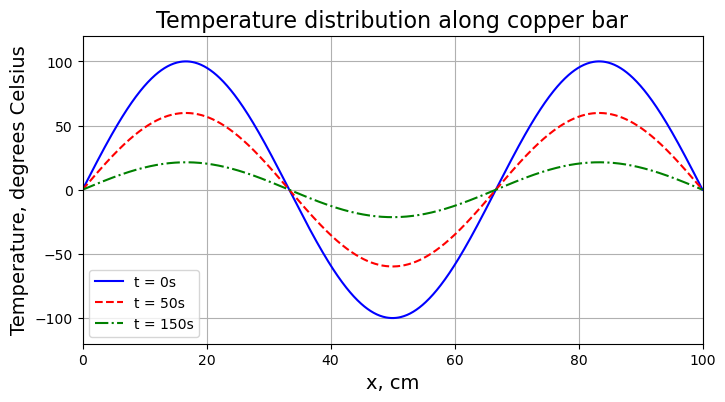

In [17]:
# ANSWER CELL

# Do not modify this line for grading purposes
import matplotlib.pyplot as plt

# Create figure 
fig_1 = plt.figure(figsize=(8,4)) # SOLUTION 

# Plot u(x,t) vs. x for different t values
plt.plot(x, u_t0, 'b-',  label = 't = 0s') # SOLUTION
plt.plot(x, u_t50, 'r--', label = 't = 50s') # SOLUTION 
plt.plot(x, u_t150, 'g-.', label = 't = 150s') # SOLUTION 

# Set figure title
plt.title('Temperature distribution along copper bar', fontsize= 16) # SOLUTION 

# Set axes labels
plt.xlabel('x, cm', fontsize= 14) # SOLUTION 
plt.ylabel('Temperature, degrees Celsius', fontsize= 14) # SOLUTION

# Set axis limits
plt.xlim([0,100]) # SOLUTION
plt.ylim([-120,120]) # SOLUTION 

# Add legend
plt.legend() # SOLUTION 

# Add gridlines
plt.grid() # SOLUTION 

plt.show()

In [ ]:
grader.check("q1.3")

## Question 2: Vibrating Membrane 
In this problem you will examine the natural modes of vibration of a rectangular membrane of length $a$ and width $b$, fixed along all four edges. Vibrating plates or membranes are commonly encountered in various fields such as structural engineering, mechanical engineering and acoustics. Understanding their mode shapes is crucial for analyzing their behavior and resonance frequencies.

Assuming the membrane obeys the two-dimenional wave equation, the (normalized) amplitude $f$ of the $(m,n)$ natural mode of vibration is

$$f\left(x,y,a,b\,; m,n\right) = \sin\left(\frac{m \pi}{a}x\right)\sin\left(\frac{n \pi}{b}y\right),\label{eq:modeshape}\tag{3}$$

where $x$ and $y$ are coordinates along the membrane and $m$ and $n$ are positive integer mode indices.

### Question 2.0

Write a function `mode_shape(x,y,a,b,m,n)` which takes in:
* `x`: `float` or `np.ndarray`
     * $x$ coordinates along the membrane, $x \in (0,a)$
* `y`: `float` or `np.ndarray`
     * $y$ coordinates along the membrane, $y \in (0,b)$
* `a`: `float`
     * membrane length, $a > 0$
* `b`: `float`
     * membrane width, $b > 0$
* `m`: `int`
     * mode index along x, $m = 1,2,3,\dots$
* `n`: `int`
     * mode index along y, $n = 1,2,3,\dots$

and returns the mode amplitude $f\left(x,y,a,b\,; m,n\right)$ shown in Eq.$\eqref{eq:modeshape}$ at each point defined by `x` and `y`.


Once you are done, test your `mode_shape` function for `x = np.linspace(0,1)`,`y = np.linspace(0,1)`,`a = 1`,`b = 1`,`m = 1`,`n = 1` and assign it to the variable `q2_0`.

In [21]:
# ANSWER CELL
# BEGIN SOLUTION NO PROMPT
mode_shape = lambda x,y,a,b,m,n: np.sin(m*np.pi*x/a)*np.sin(n*np.pi*y/b) 
# END SOLUTION

In [22]:
# TEST YOUR FUNCTION HERE
q2_0 = mode_shape(x=np.linspace(0,1),y=np.linspace(0,1),a=1,b=1,m=1,n=1) # SOLUTION

In [ ]:
grader.check("q2.0")

### Question 2.1

Let us now compute the $m = 3, n =2$ natural mode of vibration for a membrane of length $a = 3$ and width $b = 2$ on a discrete two-dimensional grid. To this end, first create two linear ranges of 1000 equally spaced points each for the $x$ and $y$ coordinates, named `x` and `y`, respectively. Then, define combined two-dimensional coordinate arrays `X` and `Y` for each point on the grid. The documentation of [`np.meshgrid`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) may be helpful.

Finally, using your `mode_shape` function, compute the mode amplitude on the `X,Y` grid and assign the output array to the variable `Z`.

In [26]:
# ANSWER CELL

# Length
a = 3 # SOLUTION
# Width
b = 2 # SOLUTION
# Parameter m
m = 3 # SOLUTION
# Parameter n
n = 2 # SOLUTION

# Create x- and y-ranges
x = np.linspace(0,a,1000) # SOLUTION 
y = np.linspace(0,b,1000) # SOLUTION 

# Create combined X and Y grid
X,Y = np.meshgrid(x,y) # SOLUTION

# Compute Z
Z = mode_shape(X,Y,a,b,m,n)

In [27]:
# Do not modify and run this cell for grading purposes
x_q2_1 = np.copy(x)
y_q2_1 = np.copy(y)
X_q2_1 = np.copy(X)
Y_q2_1 = np.copy(Y)
Z_q2_1 = np.copy(Z)

In [ ]:
grader.check("q2.1")

### Question 2.2

Visualize the membrane's natural mode of vibration computed in Question 2.1 by creating a surface plot of `Z` on the `X,Y` grid. The documentation of [`plt.plot_surface`](https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.plot_surface.html#mpl_toolkits.mplot3d.axes3d.Axes3D.plot_surface) may be helpful.

Create a `matplotlib.pyplot` figure stored in `fig_2` and perform the following tasks on the same figure:
* Create a surface plot of the natural mode shape for $a = m = 3$ and $b= n = 2$, i.e. `Z` vs. `X` and `Y`.
* Set the surface colormap to `plasma`.
* Set the figure title to  "Natural mode shape for m = 3, n = 2" with font size 14.
* Set the x-axis label to "X" with font size 12.
* Set the y-axis label to "Y" with font size 12.
* Set the y-axis label to "Z" with font size 12.
* Adjust the plot to have equal axis aspect ratio, refer to the [documentation.](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/axis_equal_demo.html)
* Adjust the viewing distance if some of the labels are clipped from the figure. Take a look at the `zoom` argument of [set_box_axpect.](https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.set_box_aspect.html)

When you are finished, your figure should look like Figure 3. Feel free to experiment with plotting options that have not been explicitly specified.

<img src="resources/q2_2.png" width=45%/>
<figcaption style="text-align:center"><strong> Figure 3. Question 2.2 plot.</strong></figcaption>   

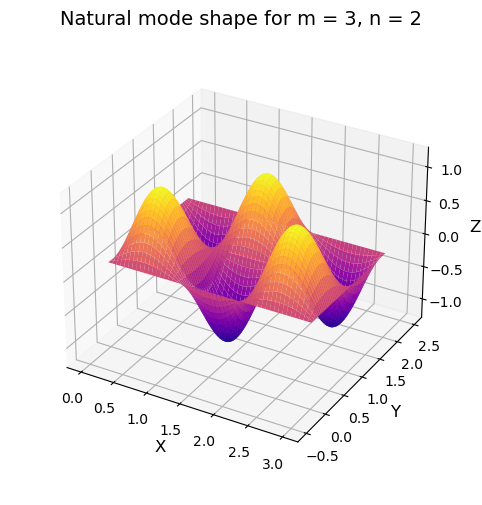

In [29]:
# ANSWER CELL

# Create figure
fig_2 = plt.figure(figsize = (8,6)) # SOLUTION

# Create axes with 3d projection
ax = plt.axes(projection='3d') # SOLUTION

# Plot surface
ax.plot_surface(X, Y, Z,cmap = 'plasma') # SOLUTION

# Set title
ax.set_title('Natural mode shape for m = 3, n = 2', fontsize = 14) # SOLUTION

# Set labels
ax.set_xlabel('X', fontsize = 12) # SOLUTION
ax.set_ylabel('Y', fontsize = 12) # SOLUTION
ax.set_zlabel('Z', fontsize = 12) # SOLUTION
ax.set_box_aspect(aspect=None, zoom=0.89) # SOLUTION NO PROMPT

# Set axes aspect ratio
ax.axis('equal') # SOLUTION

plt.show() 

In [ ]:
grader.check("q2.2")

### Question 2.3

Create another set of two-dimensional coordinate grids `X` and `Y` of 1000 equally spaced points in each direction for a square membrane of unit length $a = b = 1$. Then, create a `matplotlib.pyplot` figure stored in `fig_3` and perform the following tasks on the same figure:
* Create a 2x2 subplot layout and plot the membrane mode shape for $m ,n = {1,2}$. Store the subplot axes in the variable `axs`. The subplot in the $m$-th row and $n$-th column should contain the mode shape for the respective $m$ and $n$ values. For example, the subplot in the lower left (row 2, column 1) should contain the plot for $m = 2$ and $n =1$.
* Set the figure title (suptitle) to "Mode shapes" with font size 16.
* For each plot do the following:
    * Set the surface colormap to `coolwarm`
    * Set the subplot title "m = {m}, n = {n}" where you insert the appropriate value in the braces. See Figure 4 for reference.
    * Set the x-axis label to "X".
    * Set the y-axis label to "Y".
    * Set the y-axis label to "Z".
    * Adjust the viewing distance if some of the labels are clipped from the subplot. Take a look at the `zoom` argument of [set_box_axpect.](https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.set_box_aspect.html)


When you are finished, your figure should look like Figure 4. Feel free to experiment with plotting options that have not been explicitly specified.


<img src="resources/q2_3.png" width = 60%/>
<figcaption style="text-align:center"><strong> Figure 4. Question 2.3 plot.</strong></figcaption>   
</figure>

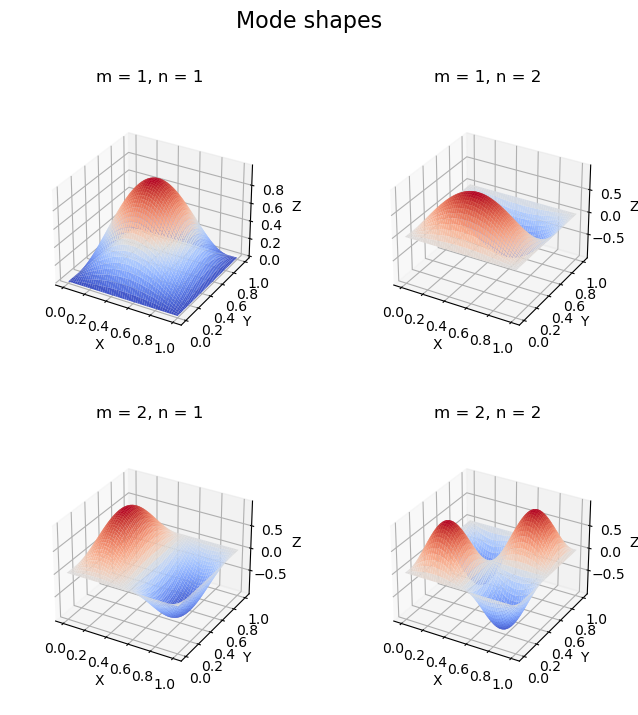

In [31]:
# ANSWER CELL

# Do not modify this line for grading purposes
import matplotlib.pyplot as plt

# length and width 
a = 1
b = 1

# Create x and y 1D grids
x = np.linspace(0,a,1000) # SOLUTION 
y = np.linspace(0,b,1000) # SOLUTION 

# Create combined x and y 2D grid
X,Y = np.meshgrid(x,y) # SOLUTION

# Create figure of 2x2 3D subplots
fig_3, axs = plt.subplots(2, 2, figsize=(8, 8), subplot_kw=dict(projection='3d'))  # SOLUTION 

# Plot mode shape on each subplot
# BEGIN SOLUTION NO PROMPT
mode_ind = [1,2]
for m in mode_ind:
    for n in mode_ind: 
        axs[m-1,n-1].plot_surface(X, Y, mode_shape(X,Y,a,b,m,n), cmap='coolwarm')
        axs[m-1,n-1].set(title='m = {m}, n = {n}'.format(m=m,n=n),xlabel='X', ylabel='Y', zlabel='Z')
        axs[m-1,n-1].set_box_aspect(aspect=None, zoom=0.8)
# END SOLUTION 

# Set figure title
fig_3.suptitle('Mode shapes', fontsize=16) # SOLUTION 

plt.show()

In [32]:
# Do not modify and run this cell for grading purposes
x_q2_3 = np.copy(x)
y_q2_3 = np.copy(y)
X_q2_3 = np.copy(X)
Y_q2_3 = np.copy(Y)

In [ ]:
grader.check("q2.3")

## Question 3: Wind over North America

In this problem you will examine and visualize a sample dataset of air currents over North America. 

### Question 3.0

The `resources` folder contains the following CSV data files on a 35 x 41 grid:

* `wind_x.csv`: $x$ coordinates (longitude) 
* `wind_y.csv`: $y$ coordinates (latitude) 
* `wind_u.csv`: $x$ components of velocity
* `wind_v.csv`: $y$ components of velocity

First, read the data files listed above using [`np.loadtxt`](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) and assign the arrays to the variables `wind_x`, `wind_y`, `wind_u` and `wind_v`, respectively. Make sure to specify the `delimiter` argument which is the character used to separate the values in the file. Recall that CSV stands for "comma-separated values".

*Hint:* The relative file path to `wind_x.csv`, for example, is `resources/wind_x.csv`.

In [35]:
# ANSWER CELL

# Read wind_x data
wind_x = np.loadtxt('resources/wind_x.csv',delimiter=',') # SOLUTION

# # Read wind_y data
wind_y = np.loadtxt('resources/wind_y.csv',delimiter=',') # SOLUTION

# # Read wind_u data
wind_u = np.loadtxt('resources/wind_u.csv',delimiter=',') # SOLUTION

# # Read wind_v data
wind_v = np.loadtxt('resources/wind_v.csv',delimiter=',') # SOLUTION

In [ ]:
grader.check("q3.0")

### Question 3.1

Compute the magnitude of the wind velocity at each grid point and assign it to the variable `wind_mag`. Make sure to preserve the shape of the wind velocity arrays. The magnitude of a 2D vector $\vec{v}$ with components $v_x$ and $v_y$ is defined as:

$$ ||\vec{v}|| = \sqrt{v_x^2 + v_y^2}$$

In [38]:
# ANSWER CELL

# Compute magnitude of wind velocity on the grid
wind_mag = np.sqrt(wind_u**2+wind_v**2) # SOLUTION

In [ ]:
grader.check("q3.1")

### Question 3.2

Write the array `wind_mag` to `resources/wind_mag.csv` using [`np.savetxt`](https://numpy.org/doc/stable/reference/generated/numpy.savetxt.html). Use a comma (`,`) delimiter.

In [40]:
# Write the wind magnitude data to a csv file
np.savetxt('resources/wind_mag.csv', wind_mag, delimiter=',') # SOLUTION

In [ ]:
grader.check("q3.2")

### Question 3.3

Now, we'll plot the wind data overlaid on a map of North America with the help of the `cartopy` module (refer to [Chapter 12.3](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter12.03-Working-with-Maps.html) of the course textbook).

After you've familiarized yourself with `cartopy`, create a `matplotlib.pyplot` figure stored in `fig_4` and perform the following tasks on the same figure:
* Create figure axes using the Plate Carrée projection and draw coastlines on the plot. 
* Create a filled contour plot (`contourf`) of the velocty magnitude and assign it to the variable `wind_contour`. Note that the data is already provided on a 2D meshgrid. Set the number of levels to 20.
* Add a colorbar of the contour plot to the figure and assign it to the variable `cbar_wind`. Set the scale (`shrink`) factor to an appropriate value.
* Add a grid to the figure with transparency (`alpha`) of 0.5 and assign it to the variable `grid`. The gird lines should also be dotted (`:`) and black (`k`). Also, draw longitude and latitude tick labels only on the bottom and left sides. Refer to the documentation and [examples](https://scitools.org.uk/cartopy/docs/latest/gallery/gridlines_and_labels/gridliner.html). 
* Set the title to "Wind velocity magnitude".
* Set the x and y axes limits/extent to the minimum and maximum values in `wind_x` and `wind_y`, respectively. Make sure to specify the `crs` (coordinate reference system) argument of the `set_extent` method to be the `ccrs.PlateCarree()` projection like the axes. This way the coordinates will be aligned with the figure regardless of its dimensions.
 
When you are finished, your figure should look like Figure 5. Feel free to experiment with plotting options that have not been explicitly specified.


<img src="resources/q3_3.png" width = 60%/>

<figcaption style="text-align:center"><strong>Figure 5. Question 3.3 plot.</strong></figcaption>   
 

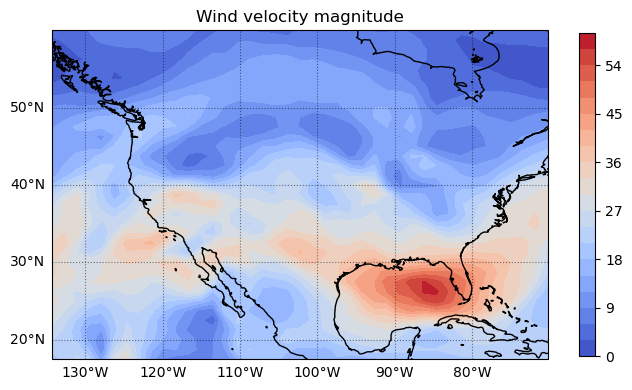

In [42]:
# ANSWER CELL

# Do not modify these lines for grading purposes
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create figure
fig_4 = plt.figure(figsize=(8, 6)) # SOLUTION

# Create axes using Plate Carrée projection
ax = plt.axes(projection=ccrs.PlateCarree())  # SOLUTION

# Add coastilines
ax.coastlines() # SOLUTION

# Create wind magnitude filled contour plot
wind_contour = ax.contourf(wind_x,wind_y,wind_mag,cmap='coolwarm', levels = 20)  # SOLUTION 

# Create colorbar
cbar_wind = plt.colorbar(wind_contour,shrink = 0.7) # SOLUTION

# Set limits/extent of plot
ax.set_extent([wind_x.min(), wind_x.max(), wind_y.min(), wind_y.max()], crs=ccrs.PlateCarree()) # SOLUTION

# Add grid lines
grid = ax.gridlines(draw_labels=True, alpha=0.5, linestyle=':',color = 'k')  # SOLUTION 
grid.top_labels = False  # SOLUTION NO PROMPT
grid.right_labels = False  # SOLUTION NO PROMPT

# Set title
ax.set_title('Wind velocity magnitude') # SOLUTION

plt.show()

In [ ]:
grader.check("q3.3")

### Question 3.4

Lastly, we'll plot the wind vector field using `quiver`. Create a `matplotlib.pyplot` figure stored in `fig_5` and perform the following tasks on the same figure:
* Create axes using the Plate Carrée projection and draw coastlines on the plot.
* Create a vector plot (`quiver`) of the velocty field and assign it to the varaible `vel_quiver`.  Note that the data is already provided on a 2D meshgrid. Feel free to experiment with the colormap but use the `wind_mag` array as the colormapping values of the arrows. 
* Add a colorbar of the contour plot to the figure and assign it to the variable `cbar_wind`. Set the title to "Magnitude" and the scale (`shrink`) factor to an appropriate value.
* Add a grid to the figure with transparency (`alpha`) of 0.5 and assign it to the variable `grid`. The gird lines should also be dotted (`:`) and black (`k`). Also, draw longitude and latitude tick labels only on the bottom and left sides. Refer to the documentation and [examples](https://scitools.org.uk/cartopy/docs/latest/gallery/gridlines_and_labels/gridliner.html). 
* Set the title to "Wind velocity field".
* Set the x and y axes limits/extent to the minimum and maximum values in `wind_x` and `wind_y`, respectively. Make sure to specify the `crs` (coordinate reference system) argument of the `set_extent` method to be the `ccrs.PlateCarree()` projection like the axes. This way the coordinates will be aligned with the figure regardless of its dimensions.
 
When you are finished, your figure should look like Figure 6. Feel free to experiment with plotting options that have not been explicitly specified.

<img src="resources/q3_4.png" width = 60%/>

<figcaption style="text-align:center"><strong>Figure 6. Question 3.4 plot.</strong></figcaption>   


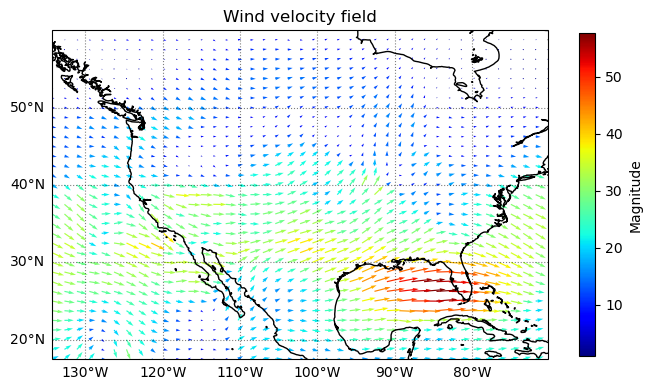

In [46]:
# ANSWER CELL

# Do not modify these lines for grading purposes
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create figure
fig_5 = plt.figure(figsize=(8, 6)) # SOLUTION

# Create axes using Plate Carrée projection
ax = plt.axes(projection=ccrs.PlateCarree())  # SOLUTION

# Add coastilines
ax.coastlines() # SOLUTION

# Create wind magnitude filled contour plot
vel_quiver = ax.quiver(wind_x,wind_y,wind_u,wind_v,wind_mag, cmap = 'jet') # SOLUTION 

# Create colorbar
cbar_wind = plt.colorbar(vel_quiver,shrink = 0.7,label = 'Magnitude') # SOLUTION

# Set limits/extent of plot
ax.set_extent([wind_x.min(), wind_x.max(), wind_y.min(), wind_y.max()], crs=ccrs.PlateCarree()) # SOLUTION

# Add grid lines
grid = ax.gridlines(draw_labels=True, alpha=0.5, linestyle=':',color = 'k')  # SOLUTION 
grid.top_labels = False  # SOLUTION NO PROMPT
grid.right_labels = False  # SOLUTION NO PROMPT

# Set title
ax.set_title('Wind velocity field') # SOLUTION

plt.show()

In [ ]:
grader.check("q3.4")

## Problem 4: Earthquakes

In this problem you will analyze and visualize earthquake data for the continental United States in 2022.

### Question 4.0

The `resources/earthquakes_2022.csv` file contains records of earthquakes with magnitude 3.5 and above in the continental United States during 2022. The data file has 229 rows, each representing a different earthquake event, with the following data in 3 columns :

1. decimal degrees latitude
2. decimal degrees longitude
3. the magnitude of the event

The columns are ordered as listed above. Read the data file using [`np.loadtxt`](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) and assign the array to the variable `eq_data`. Make sure to specify the `delimiter` argument which is the character used to separate the values in the file. Recall that CSV stands for "comma-separated values".

In [50]:
# ANSWER CELL

# Read data
eq_data = np.loadtxt('resources/earthquakes_2022.csv',delimiter = ',') # SOLUTION

# Display data
eq_data

array([[  33.3975    , -116.3933333 ,    4.14      ],
       [  40.5571667 , -124.0083333 ,    4.16      ],
       [  40.3601667 , -124.3346667 ,    3.79      ],
       [  44.3432    , -115.1654    ,    3.8       ],
       [  40.5455    , -124.3291667 ,    4.35      ],
       [  40.6005    , -124.0688333 ,    3.99      ],
       [  40.5273333 , -124.3543333 ,    3.52      ],
       [  40.5228333 , -124.1881667 ,    4.92      ],
       [  40.525     , -124.423     ,    6.4       ],
       [  37.9181667 , -122.304     ,    3.57      ],
       [  32.19085693, -102.1406965 ,    5.2       ],
       [  30.8464    , -116.3895    ,    4.4       ],
       [  35.5086667 , -118.3915    ,    3.56      ],
       [  41.9732    , -119.5587    ,    3.5       ],
       [  35.9356667 , -120.0126667 ,    3.98      ],
       [  37.3258333 , -121.6876667 ,    3.59      ],
       [  31.66602425, -104.2416858 ,    3.5       ],
       [  37.1563333 , -118.338     ,    3.91      ],
       [  32.8361667 , -116.

In [ ]:
grader.check("q4.0")

### Question 4.1

Create a `matplotlib.pyplot` figure stored in `fig_6` and perform the following tasks on the same figure:
* Create a histogram using [`plt.hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) with 5 bins in the range (3,8) and assign the output to the variables `values, bins, bars`. Set the bin edge color to black (`k`).
* Set the title to "Continental US earthquakes in 2022".
* Set the x-axis label to "Magnitude".
* Set the y-axis label to "Frequency".
* Label the histogram bars with the count in each bin (*Hint:* Refer to the documentation of `plt.bar_label`.).
 
When you are finished, your figure should look like Figure 10. Feel free to experiment with plotting options that have not been explicitly specified.

<img src="resources/q4_1.png" width = 50%/>

<figcaption style="text-align:center"><strong>Figure 7. Question 4.1 plot.</strong></figcaption>   


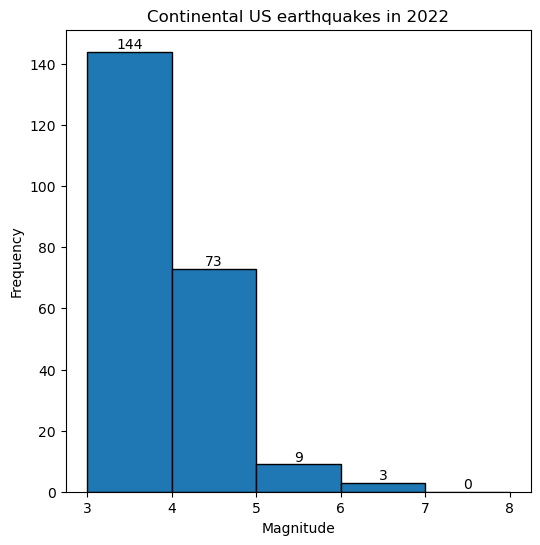

In [61]:
# ANSWER CELL

# Do not modify these lines for grading purposes
import matplotlib.pyplot as plt

# Create figure
fig_6 = plt.figure(figsize=(6,6))  # SOLUTION

# Plot histogram
values, bins, bars = plt.hist(eq_data[:,2], bins = 5, ec = 'k', range = (3,8))  # SOLUTION
 
# Set title and labels
plt.title('Continental US earthquakes in 2022') # SOLUTION
plt.xlabel('Magnitude') # SOLUTION
plt.ylabel('Frequency') # SOLUTION

# Add bar labels
plt.bar_label(bars) # SOLUTION

plt.show()

In [ ]:
grader.check("q4.1")

### Question 4.2

We will now zoom in on the state of California and the surrounding area. Create a `matplotlib.pyplot` figure stored in `fig_7` and perform the following tasks on the same figure:
* Create axes using the Plate Carrée projection and draw coastlines on the plot.
* Create a scatter plot (`scatter`) of the earthquake location and assign it to the variable `eq_scatter`. 
* Use the magnitude data for the color mapping and set the transparency (`alpha`) of the markers to 0.5. 
* Use the magnitude data to the fourth power (`**4`) for the marker size mapping.
* Add a colorbar to the figure and assign it to the variable `cbar_eq`. Set the scale (`shrink`) factor to an appropriate value and set the label to 'Magnitude'.
* Add a grid to the figure with transparency (`alpha`) of 0.5 and assign it to the variable `grid`. The gird lines should also be dotted (`:`) and black (`k`). Also, draw longitude and latitude tick labels only on the bottom and left sides. Refer to the documentation and [examples](https://scitools.org.uk/cartopy/docs/latest/gallery/gridlines_and_labels/gridliner.html).  Also, draw longitude and latitude tick labels only on the bottom and left sides. Refer to the [documentation](https://scitools.org.uk/cartopy/docs/latest/gallery/gridlines_and_labels/gridliner.html). 
* Set the title to 'CA area earthquakes in 2022'.
* To create a rough bounding box around California:
    * set the x-axis limits to (-126,-114).
    * set the y-axis limits to (32,42).
    * Make sure to specify the `crs` (coordinate reference system) argument of the `set_extent` method to be the `ccrs.PlateCarree()` projection like the axes. This way the coordinates will be aligned with the figure regardless of its dimensions.
 
When you are finished, your figure should look like Figure 8. Feel free to experiment with plotting options that have not been explicitly specified.


<img src="resources/q4_2.png" width = 60%/>

<figcaption style="text-align:center"><strong>Figure 8. Question 4.2 plot.</strong></figcaption>   


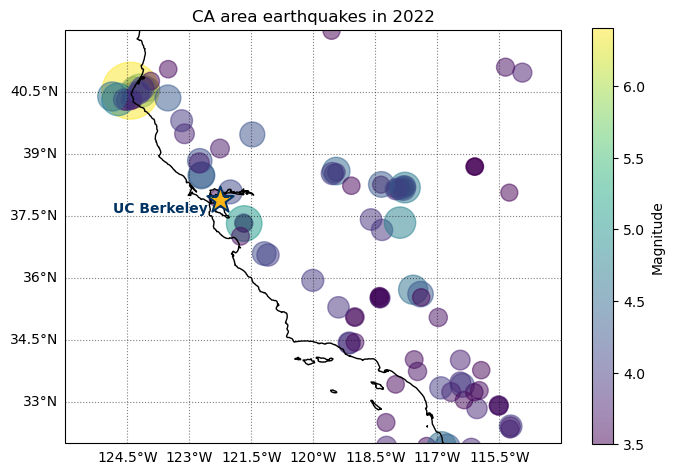

In [55]:
# ANSWER CELL

# Do not modify these lines for grading purposes
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create figure
fig_7 = plt.figure(figsize=(8, 6)) # SOLUTION

# Create axes using Plate Carrée projection
ax = plt.axes(projection=ccrs.PlateCarree())  # SOLUTION

# Add coastilines
ax.coastlines() # SOLUTION

# Scatter plot of earthquakes
eq_scatter = plt.scatter(eq_data[:,1],eq_data[:,0],s = eq_data[:,2]**4,c = eq_data[:,2],alpha = 0.5)  # SOLUTION 

# Create colorbar
cbar_eq = plt.colorbar(eq_scatter,shrink = 0.9,label = 'Magnitude') # SOLUTION

# Set axes extent/limits    
ax.set_extent([-126,-114,32,42], crs=ccrs.PlateCarree()) # SOLUTION

# Add grid lines
grid = ax.gridlines(draw_labels=True, alpha=0.5, linestyle=':',color = 'k')  # SOLUTION 
grid.top_labels = False  # SOLUTION NO PROMPT
grid.right_labels = False  # SOLUTION NO PROMPT

# Set title
ax.set_title('CA area earthquakes in 2022') # SOLUTION

# Plot UC Berkeley on the map, no need to modify this code
berkeley_lon, berkeley_lat = -122.2585, 37.8719
berkeley_blue = np.array([0, 50, 98])/255
berkeley_gold = np.array([253, 181, 21])/255
ax.scatter(berkeley_lon, berkeley_lat, marker='*', ec=berkeley_blue, 
           c=[berkeley_gold], linewidth=1.4, s=400, zorder=2)
ax.text(berkeley_lon - 0.3, berkeley_lat - 0.3, 'UC Berkeley',
         horizontalalignment='right',color = berkeley_blue, weight="bold")

plt.show()

In [ ]:
grader.check("q4.2")

## (Optional) Question 5: Potential flow around a circular cylinder
 
Potential flow around a circular cylinder is a classical problem in fluid dynamics. It inovles the flow of an inviscid, incompressible fluid around a circular cylinder transverse to the flow. Far from the cylinder, the flow is unidirectional and uniform with a constant velocity $U$ in the x-direction. The flow has no vorticity and thus the velocity field is irrotational which allows for closed-form analytical solutions for quantities of interest.

*Note:* This question is not graded and is provided solely for additional practice.

<img src="resources/flow.gif" width=50%/>
 <figcaption style="text-align:center"><strong> Figure 9. Potential flow around a circular cylinder,</strong> <a href="https://en.wikipedia.org/wiki/Potential_flow_around_a_circular_cylinder#/media/File:Inviscid_flow_around_a_cylinder.gif">Wikipedia</a></figcaption>   

### Question 5.0

First, we'll determine the pressure field. Let the coordinate system be centered on the cicular cylinder with radius $R$. The solution for the (gauge) *pressure* field $p$ in polar coordinates assuming unit density is then 
$$ p = \frac{1}{2} U^2 \left( 2 \frac{R^2}{r^2}\cos\left(2\theta\right) - \frac{R^4}{r^4}\right) \label{eq:pressure}\tag{4} $$ 
Another quantity of interest is the so-called *stream function* $\psi$. It can be used to plot streamlines, which represent the trajectories of particles in a steady flow. The stream function for this problem is
$$\psi  = Ur\left(1-{\frac {R^{2}}{r^2}}\right)\sin \theta \label{eq:stream}\tag{5} $$
Finally, we are also interested in the *velocity potential* $\phi$. We'll use it to plot equipotential lines along which the fluid has uniform velocity. The velocity potential for this problem is
$$ \phi = Ur\left(1+{\frac {R^{2}}{r^{2}}}\right)\cos \theta  \label{eq:velpotential}\tag{6} $$

Let the cylinder radius have radius $R = 1$ and the far field fluid velocity be $U = 10$. You are tasked with computing the three quantities described above on a uniform two-dimensional **polar** grid. The polar coordinates are the radius $r$ and angle $\theta$. The grid should have 1000 equally spaced points in the radial direction within the range $\left[R, 10R\right]$ and 1000 equally spaced points in the angular direction within the range $\left[0, 2\pi\right]$.

In [59]:
# Fluid velocity away from the cylinder
U = 10  # SOLUTION 

# Cylinder radius
R = 1  # SOLUTION 

# Create r and theta 1D grids
theta = np.linspace(0,2*np.pi,1000)  # SOLUTION 
rr = np.linspace(R,10*R,1000) # SOLUTION        

# Create meshgrid in two dimensions
t,r = np.meshgrid(theta,rr) # SOLUTION   

# Compute pressure around the cylinder, Equation 4
pressure = 0.5*U**2*(2*(R**2/r**2)*np.cos(2*t)-(R**4/r**4)) # SOLUTION  

# Compute stream function, Equation 5
stream = U*np.sin(t)*r*(1-(R**2/(r**2))) # SOLUTION    

# Compute velocity potential , Equation 6
velocity_potential = U*r*(1+R**2/r**2)*np.cos(t) # SOLUTION    

In [ ]:
grader.check("q5.0")

### Question 5.1

Now, we will plot the pressure, streamlines and velocty equipotential lines. First, we'll need to convert the 2D polar grid to Cartesian coordinates. The relatonship between polar and Cartesian coordiantes is
\begin{align}
x &= r \cos{\theta} \\
y &= r \sin{\theta}
\end{align}

After you convert the grid, create a `matplotlib.pyplot` figure stored in `fig_8` and perform the following tasks on the same figure:
* Create a filled contour plot (`contourf`) of the pressure field and assign it to the variable `pressure_contour`. Set the number of levels to 50 and the colormap to `jet`.
* Add a colorbar of the pressure field plot to the figure and assign it to the variable `cbar_pressure`. The colorbar should have only two ticks - at the minimum and maximum value which occur in the plot and the labels should respectively be "Low" and "High" in that order.
* Create a contour plot (`contour`) of the streamlines and assign it to the variable `stream_contour`.. Set the number of levels to 50, the line width to 0.8 and the line color to black (`k`).
* Create a contour plot (`contour`) of the velocity potential and assign it to the variable `velocity_contour`. Set the number of levels to 50, the line width to 0.8 and the line color to white (`w`).
* Set the title to "Pressure field" with font size 14.
* Set the x-axis label to "x" with font size 12.
* Set the y-axis label to "y" with font size 12.
* Set the x-axis limits to (-5,5).
* Set the y-axis limits to (-5,5).
* Remove the ticks from the x and y axes.

*Hint:* The `negative_linestyle` may be useful for the `contour` plots.


When you are finished, your figure should look like Figure 10. Feel free to experiment with plotting options that have not been explicitly specified.


<img src="resources/q5_1.png" width = 50%/>
 <figcaption style="text-align:center"><strong> Figure 10. Question 5.1 plot.</strong></figcaption>   


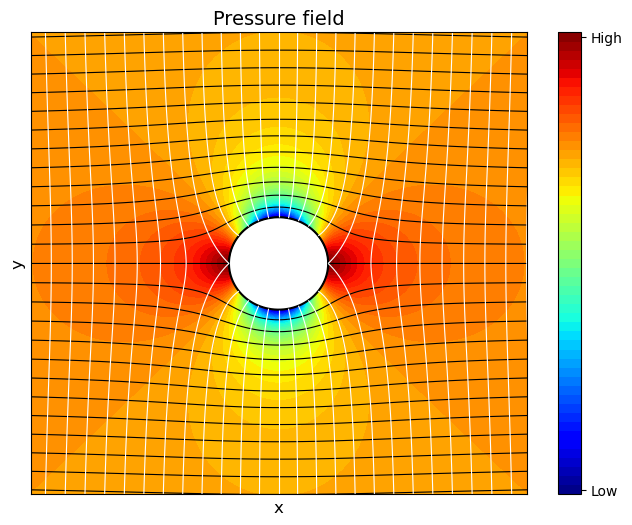

In [62]:
# ANSWER CELL

# Do not modify this line for grading purposes
import matplotlib.pyplot as plt

# Convert polar to cartesian coordinates
X, Y = r*np.cos(t), r*np.sin(t) # SOLUTION    

# Create figure
fig_8 = plt.figure(figsize=(8,6)) # SOLUTION  

# Plot circle/cylinder, do not modify
th =  np.linspace(0,2*np.pi,100)  
xunit = np.cos(th)
yunit = np.sin(th)
h = plt.plot(xunit, yunit,'-k')

# Pressure plot
pressure_contour = plt.contourf(X,Y,pressure,50, cmap = 'jet') # SOLUTION    

# Create colorbar and set the ticks and tick labels
cbar_pressure = fig_8.colorbar(pressure_contour, ticks = [pressure.min(), pressure.max()]) # SOLUTION    
cbar_pressure.ax.set_yticklabels(['Low','High'])  # SOLUTION    

# Streamline contour plot
stream_contour = plt.contour(X,Y,stream,levels=50,colors = 'k',negative_linestyles = '-',linewidths = 0.8) # SOLUTION 

# Velocity equipotential lines contour plot
velocity_contour = plt.contour(X,Y,velocity_potential,levels=50, colors = 'w',negative_linestyles = '-',linewidths = 0.8) # SOLUTION    

# Set title
plt.title('Pressure field',fontsize = 14) # SOLUTION    

# Set axes labels
plt.xlabel('x',fontsize = 12) # SOLUTION    
plt.ylabel('y',fontsize = 12) # SOLUTION    

# Set axes ticks
plt.xticks([]) # SOLUTION    
plt.yticks([]) # SOLUTION    

# Set axes limits 
plt.xlim(-5,5) # SOLUTION    
plt.ylim(-5,5) # SOLUTION    

plt.show()

In [63]:
# Do not modify and run this cell for grading purposes
X_q5_1 = np.copy(X)
Y_q5_1 = np.copy(Y)

In [ ]:
grader.check("q5.1")

### Question 5.2

Finally, we will plot the fluid velocity magnitude and vector field around the cylinder. The velocty vector components in polar coordiantes are

$$v_{r}={\frac {\partial \phi }{\partial r}}=U\left(1-{\frac {R^{2}}{r^{2}}}\right)\cos \theta, \label{eq:vr}\tag{7}$$

$$v_{\theta }={\frac {1}{r}}{\frac {\partial \phi }{\partial \theta }}=-U\left(1+{\frac {R^{2}}{r^{2}}}\right)\sin \theta, \label{eq:vt}\tag{8} $$

Compute these quantities on the 2D polar grid from Question 3.0 and do not modify the code which converts them to the Cartesian components $v_x$ and $v_y$. The magnitude of a 2D vector $\vec{v}$ with components $v_x$ and $v_y$ is defined as:
$$ ||\vec{v}|| = \sqrt{v_x^2 + v_y^2} , \label{eq:vnorm}\tag{9}$$

When you are done, create a `matplotlib.pyplot` figure stored in `fig_9` and perform the following tasks on the same figure:
* Create a filled contour plot (`contourf`) of the velocty magnitude $\eqref{eq:vnorm}$ and assign it to the variable `v_contour`. Set the number of levels to 30 and the colormap to `jet`.
* Add a colorbar of the velocity magniude plot to the figure and assign it to the variable `cbar_vel`. The colorbar should have only two ticks - at the minimum and maximum value which occur in the plot and the labels should respectively be "Low" and "High" in that order.
* Create a vector plot (`quiver`) of the velocity field $v_x, v_y$ and assign it to the variable `v_quiver`. Because the grid is so dense, plot at only every 25th grid point in each direction (*Hint:* Use step slicing). Set the scale factor to 200.
* Set the title to "Velocity field" with font size 14.
* Set the x-axis label to "x" with font size 12.
* Set the y-axis label to "y" with font size 12.
* Set the x-axis limits to (-3,3).
* Set the y-axis limits to (-3,3).
* Remove the ticks from the x and y axes.

*Hint:* The `negative_linestyle` may be useful for the `contour` plots.


When you are finished, your figure should look like Figure 11. Feel free to experiment with plotting options that have not been explicitly specified.


<img src="resources/q5_2.png" width = 50%/>
 <figcaption style="text-align:center"><strong> Figure 11. Question 5.2 plot.</strong></figcaption>   


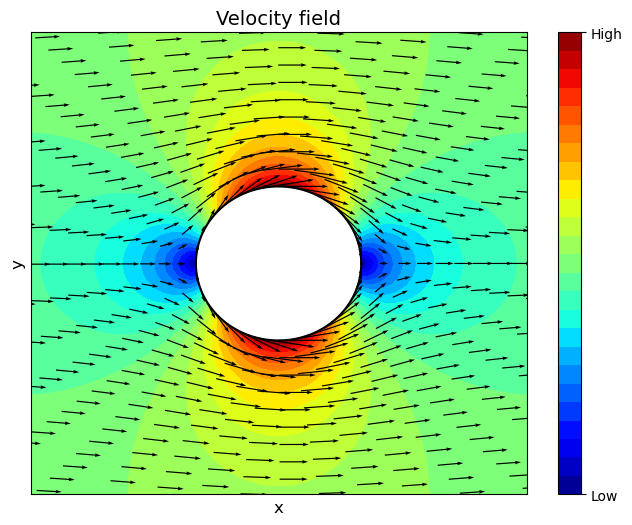

In [67]:
# ANSWER CELL

# Do not modify this line for grading purposes
import matplotlib.pyplot as plt

# Velocity in polar coordinates
vr =  U*(1-R**2/r**2)*np.cos(t) # SOLUTION
vt = -U*(1+R**2/r**2)*np.sin(t) # SOLUTION

# Velocity in cartesian coordinates, do not modify these lines
vx = vr*np.cos(t) - vt*np.sin(t)
vy = vr*np.sin(t) + vt*np.cos(t)

# Create figure
fig_9 = plt.figure(figsize=(8,6)) # SOLUTION

# Plot circle/cylinder, do not modify
th =  np.linspace(0,2*np.pi,100)  
xunit = np.cos(th)
yunit = np.sin(th)
h = plt.plot(xunit, yunit,'-k')

# Compute velocity magnitude
v_mag = np.sqrt(vx**2+vy**2) # SOLUTION

# Velocity magnitude filled contour plot
v_contour = plt.contourf(X,Y, v_mag,cmap = 'jet',levels = 30) # SOLUTION
                  
# Add velocity magnitude colorbar
cbar_vel = fig_9.colorbar(v_contour, ticks = [v_mag.min(), v_mag.max()]) # SOLUTION
cbar_vel.ax.set_yticklabels(['Low','High']) # SOLUTION
                  
# Velocity vector field quiver plot
step = 25 # SOLUTION
v_quiver = plt.quiver(X[::step,::step],Y[::step,::step],vx[::step,::step],vy[::step,::step], scale=200) # SOLUTION

# Set title
plt.title('Velocity field',fontsize = 14) # SOLUTION    

# Set axes labels
plt.xlabel('x',fontsize = 12) # SOLUTION    
plt.ylabel('y',fontsize = 12) # SOLUTION    

# Set axes ticks
plt.xticks([]) # SOLUTION    
plt.yticks([]) # SOLUTION    

# Set axes limits 
plt.xlim(-3,3) # SOLUTION    
plt.ylim(-3,3) # SOLUTION    

plt.show()

In [ ]:
grader.check("q5.2")

### You're done with this Lab!

**Important submission information:** After completing the assignment, click on the Save icon from the Tool Bar &nbsp;<i class="fa fa-save" style="font-size:16px;"></i>&nbsp;. After saving your notebook, **run the cell with** `grader.check_all()` and confirm that you pass the same tests as in the notebook. Then, **run the final cell** `grader.export()` and click the link to download the zip file. Then, go to Gradescope and submit the zip file to the corresponding assignment. 

**Once you have submitted, stay on the Gradescope page to confirm that you pass the same tests as in the notebook.**

Congrats on finishing Lab 6!


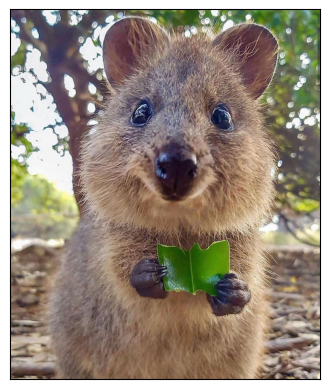

In [72]:
import matplotlib.image as mpimg
img = mpimg.imread('resources/animal.png')
imgplot = plt.imshow(img)
imgplot.axes.get_xaxis().set_visible(False)
imgplot.axes.get_yaxis().set_visible(False)
print("Congrats on finishing Lab 6!")
plt.show()

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

Make sure you submit the .zip file to Gradescope.

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)